<a href="https://colab.research.google.com/github/bhatiaparteek/GenAI-Workshop/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5: Object Detection

- In the classroom, the libraries are already installed for you.
- If you would like to run this code on your own machine, you can install the following:

```
    !pip install transformers
    !pip install gradio
    !pip install timm
    !pip install inflect
    !pip install phonemizer
```

**Note:**  `py-espeak-ng` is only available Linux operating systems.

To run locally in a Linux machine, follow these commands:
```
    sudo apt-get update
    sudo apt-get install espeak-ng
    pip install py-espeak-ng
```

### Build the `object-detection` pipeline using 🤗 Transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [ ]:
from transformers import pipeline

- Here is some code that suppresses warning messages.

In [ ]:
from transformers.utils import logging
logging.set_verbosity_error()

# from helper import ignore_warnings
# ignore_warnings()

In [ ]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.wei

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

### Use the Pipeline

In [ ]:
from PIL import Image
from google.colab import files

In [ ]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

print("✅ Uploaded:", image_path)


Saving test image.jpg to test image (1).jpg
✅ Uploaded: test image (1).jpg


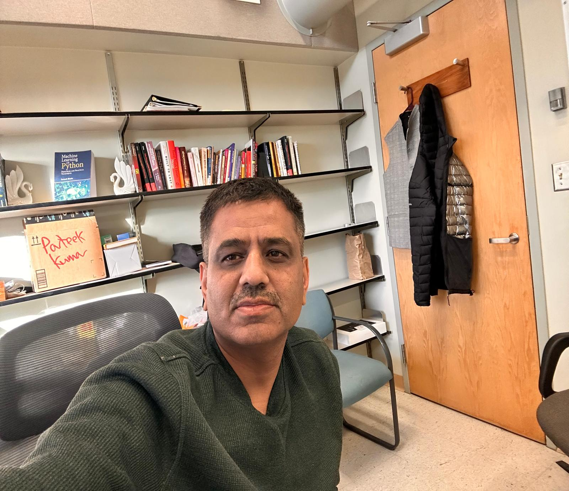

In [ ]:
raw_image = Image.open(image_path)
raw_image.resize((569, 491))

In [ ]:
pipeline_output = od_pipe(raw_image)

In [ ]:
pipeline_output

[{'score': 0.7390743494033813,
  'label': 'book',
  'box': {'xmin': 685, 'ymin': 359, 'xmax': 707, 'ymax': 439}},
 {'score': 0.9846838116645813,
  'label': 'chair',
  'box': {'xmin': 0, 'ymin': 712, 'xmax': 510, 'ymax': 1077}},
 {'score': 0.6875765323638916,
  'label': 'book',
  'box': {'xmin': 745, 'ymin': 340, 'xmax': 773, 'ymax': 432}},
 {'score': 0.7514428496360779,
  'label': 'book',
  'box': {'xmin': 598, 'ymin': 362, 'xmax': 620, 'ymax': 449}},
 {'score': 0.7626098990440369,
  'label': 'book',
  'box': {'xmin': 637, 'ymin': 361, 'xmax': 659, 'ymax': 444}},
 {'score': 0.8537530899047852,
  'label': 'book',
  'box': {'xmin': 463, 'ymin': 346, 'xmax': 505, 'ymax': 462}},
 {'score': 0.8942248821258545,
  'label': 'book',
  'box': {'xmin': 446, 'ymin': 346, 'xmax': 494, 'ymax': 465}},
 {'score': 0.781905472278595,
  'label': 'book',
  'box': {'xmin': 366, 'ymin': 347, 'xmax': 414, 'ymax': 469}},
 {'score': 0.6034954190254211,
  'label': 'book',
  'box': {'xmin': 348, 'ymin': 345, 'xm

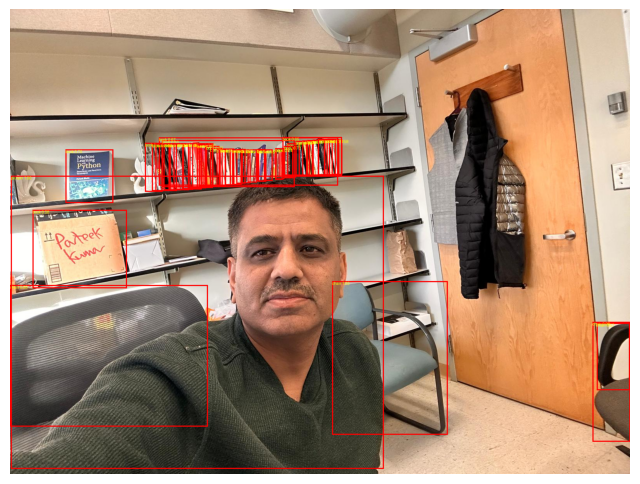

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Make a copy of the original image
img_with_boxes = raw_image.copy()
draw = ImageDraw.Draw(img_with_boxes)

# Loop through all detected objects
for obj in pipeline_output:
    box = obj['box']
    label = obj['label']
    score = obj['score']

    xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']

    # Draw rectangle
    draw.rectangle([(xmin, ymin), (xmax, ymax)], outline="red", width=3)

    # Add label text
    text = f"{label} {score:.2f}"
    draw.text((xmin, ymin), text, fill="yellow")

# Display image
plt.figure(figsize=(8, 8))
plt.imshow(img_with_boxes)
plt.axis("off")
plt.show()


- Return the results from the pipeline using the helper function `render_results_in_image`.

In [ ]:
description = []

for obj in pipeline_output:
    label = obj['label']
    score = obj['score']
    description.append(f"a {label} ")

nl_text = "The image contains " + ", ".join(description) + "."
print(nl_text)


The image contains a book , a chair , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a chair , a chair , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a book , a person , a book , a book , a book , a book , a book , a book , a book , a chair , a book , a book , a book , a book .


In [ ]:
!apt-get install -y espeak-ng
!pip install phonemizer==3.2.1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
espeak-ng is already the newest version (1.50+dfsg-10ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


### Generate Audio Narration of an Image

In [ ]:
tts_pipe = pipeline("text-to-speech",
                    model="kakao-enterprise/vits-ljs")

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [ ]:
narrated_text = tts_pipe(nl_text)

### Play the Generated Audio

In [ ]:
from IPython.display import Audio as IPythonAudio

In [ ]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself!
- Try these models with other images!